<a href="https://colab.research.google.com/github/SanBartolome/IA-diploma-course-2021/blob/main/3_Optimizacion_de_NN_Solucionado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CLASE 3: Optimizacion de Neural Networks y Transfer Learning

# Optimizers

El **MNIST** es un conjunto de datos desarrollado por Yann LeCun, Corinna Cortes y Christopher Burges. Cada imagen tiene 28 x 28 píxeles cuadrados (784 píxeles en total). Se utilizan 60.000 imágenes para formar un modelo y un conjunto separado de 10.000 imágenes para probarlo. Además, es una tarea de reconocimiento de dígitos, donde hay 10 dígitos (0 a 9) o 10 clases para predecir.

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import LearningRateScheduler
# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.0


## Carga y preprocesamiento de data

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt 
import itertools

(f_train_images, f_train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()
num_classes = 10
f_train_labels = keras.utils.to_categorical(f_train_labels, num_classes)

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# Normalize the images.
f_train_images = (f_train_images / 255.0) 
test_images = (test_images / 255.0) 
# Flatten the images.
f_train_images = f_train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

In [ ]:
Train_images, Val_images, Train_labels, Val_labels = train_test_split(f_train_images, f_train_labels, test_size = 0.1, random_state=42)

## Funciones de utilidad

In [ ]:
# Look at confusion matrix 
#Note, this code is taken straight from the SKLEARN website, an nice way of viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  plt.figure(figsize=(10, 8))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title('Confusion matrix')
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

def plot_loss_curves(h):
  # Look at learning curves
  print(h.history.keys())
  accuracy = h.history['accuracy']
  val_accuracy = h.history['val_accuracy']
  loss = h.history['loss']
  val_loss = h.history['val_loss']
  epochs = range(len(accuracy))

  plt.figure(figsize=(20, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
  plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()

def print_report(model):
  #get the predictions for the test data
  predicts = model.predict(test_images) 
  predicted_classes = np.argmax(predicts,axis=1)

  # predicted_classes = model.predict_classes(test_images)

  #get the indices to be plotted
  y_true = test_labels
  correct = np.nonzero(predicted_classes==y_true)[0]
  incorrect = np.nonzero(predicted_classes!=y_true)[0]

  target_names = ["Class {}".format(i) for i in range(num_classes)]
  print(classification_report(y_true, predicted_classes, target_names=target_names))

def build_and_train(optimizer, epochs = 10, batch_size = 32):
  # Build the model.
  model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(784,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
  ])

  model.compile(
    optimizer= optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy'],
  )

  history = model.fit(
    Train_images,
    Train_labels,
    validation_data = (Val_images, Val_labels),
    epochs = epochs,
    batch_size = batch_size,
  )

  return history, model

## Modelamiento - SGD

In [ ]:
# Compile the model.
sgd = keras.optimizers.SGD(learning_rate=0.01)

### Entrenamiento

In [ ]:
# Train the model.
h_sgd, model_sgd = build_and_train(sgd)

Epoch 1/10
1688/1688 [==============================] - 17s 8ms/step - loss: 0.7220 - accuracy: 0.8099 - val_loss: 0.3672 - val_accuracy: 0.8928
Epoch 2/10
1688/1688 [==============================] - 13s 8ms/step - loss: 0.3219 - accuracy: 0.9070 - val_loss: 0.2816 - val_accuracy: 0.9190
Epoch 3/10
1688/1688 [==============================] - 11s 7ms/step - loss: 0.2681 - accuracy: 0.9230 - val_loss: 0.2416 - val_accuracy: 0.9283
Epoch 4/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2341 - accuracy: 0.9329 - val_loss: 0.2112 - val_accuracy: 0.9400
Epoch 5/10
1688/1688 [==============================] - 13s 7ms/step - loss: 0.2085 - accuracy: 0.9407 - val_loss: 0.1947 - val_accuracy: 0.9445
Epoch 6/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.1889 - accuracy: 0.9460 - val_loss: 0.1775 - val_accuracy: 0.9498
Epoch 7/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1723 - accuracy: 0.9506 - val_loss: 0.1685 - val_accu

### Evaluación del modelo

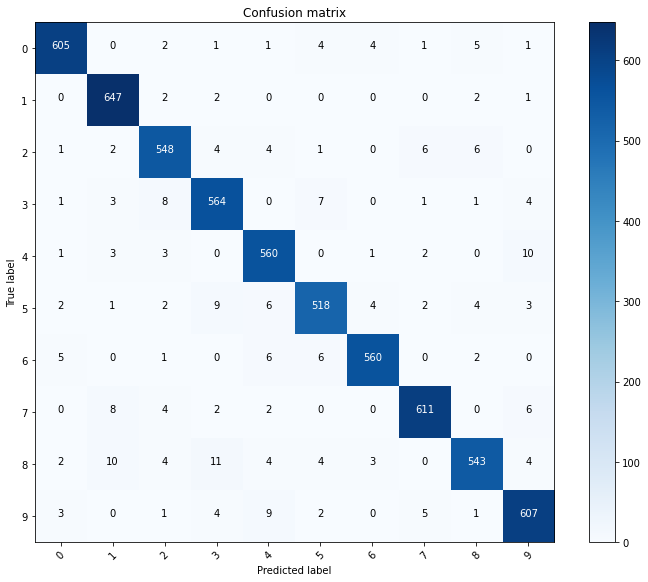

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


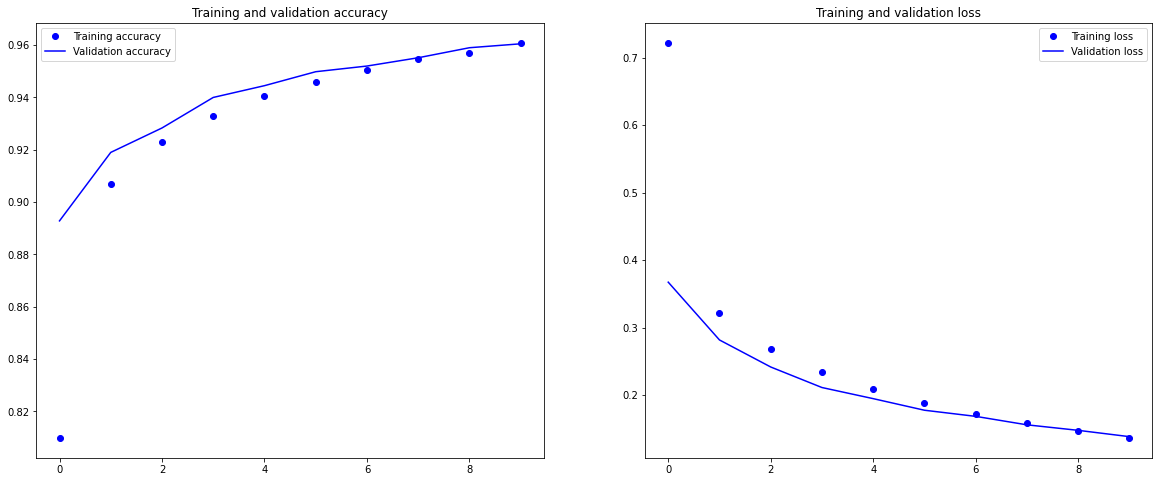

In [ ]:
# Predict the values from the validation dataset
Y_pred = model_sgd.predict(Val_images)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Val_labels, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

#plot loss curves
plot_loss_curves(h_sgd)

### Reporte de clasificación

In [ ]:
print_report(model_sgd)

              precision    recall  f1-score   support

     Class 0       0.96      0.99      0.97       980
     Class 1       0.97      0.99      0.98      1135
     Class 2       0.96      0.96      0.96      1032
     Class 3       0.94      0.96      0.95      1010
     Class 4       0.96      0.96      0.96       982
     Class 5       0.97      0.94      0.95       892
     Class 6       0.96      0.96      0.96       958
     Class 7       0.96      0.95      0.96      1028
     Class 8       0.97      0.93      0.95       974
     Class 9       0.94      0.94      0.94      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



## Modelamiento - SGD with Momentum

In [ ]:
# Compile the model.
sgdmomentum = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=False)

### Entrenamiento

In [ ]:
# Train the model.
h_momentum, model_momentum = build_and_train(sgdmomentum)

Epoch 1/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.3312 - accuracy: 0.9004 - val_loss: 0.1682 - val_accuracy: 0.9512
Epoch 2/10
1688/1688 [==============================] - 11s 7ms/step - loss: 0.1422 - accuracy: 0.9577 - val_loss: 0.1265 - val_accuracy: 0.9612
Epoch 3/10
1688/1688 [==============================] - 9s 6ms/step - loss: 0.1023 - accuracy: 0.9691 - val_loss: 0.0978 - val_accuracy: 0.9690
Epoch 4/10
1688/1688 [==============================] - 13s 8ms/step - loss: 0.0789 - accuracy: 0.9759 - val_loss: 0.0790 - val_accuracy: 0.9758
Epoch 5/10
1688/1688 [==============================] - 13s 8ms/step - loss: 0.0671 - accuracy: 0.9788 - val_loss: 0.0823 - val_accuracy: 0.9737
Epoch 6/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0562 - accuracy: 0.9825 - val_loss: 0.0842 - val_accuracy: 0.9753
Epoch 7/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0467 - accuracy: 0.9850 - val_loss: 0.0787 - val_accur

### Evaluación del modelo

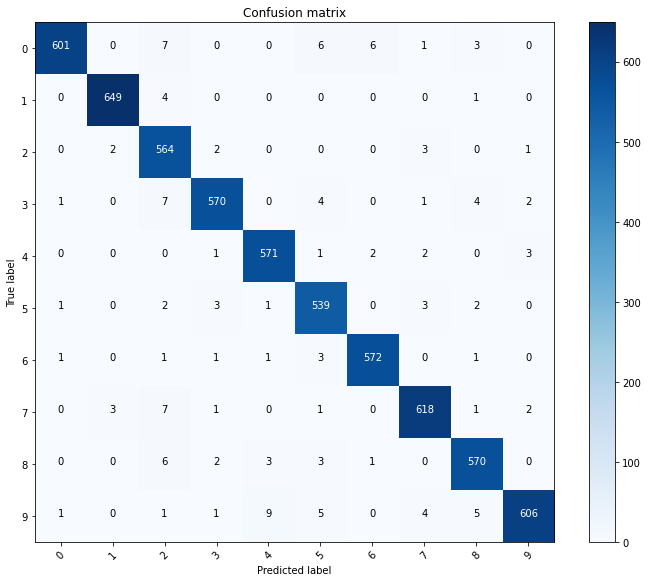

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


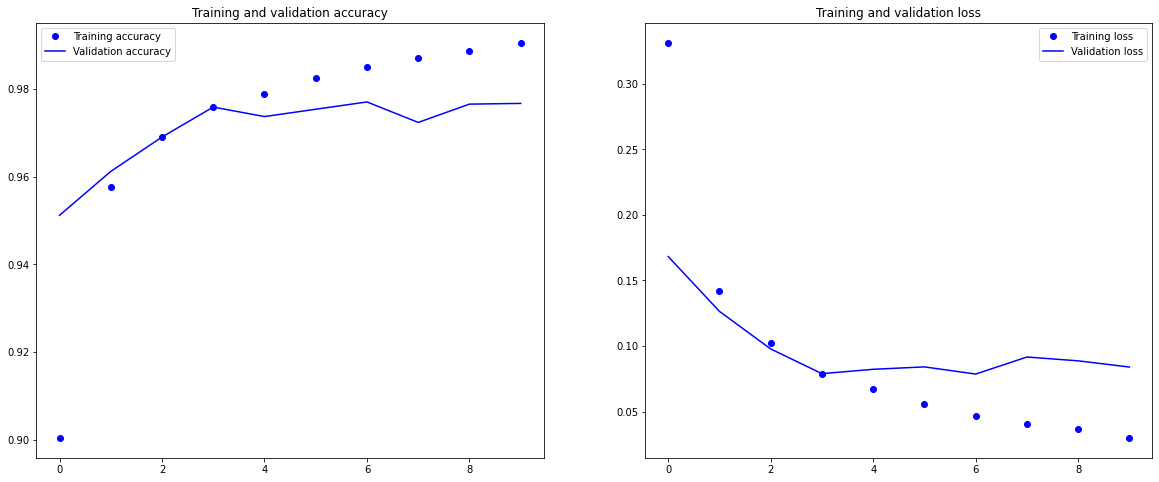

In [ ]:
# Predict the values from the validation dataset
Y_pred = model_momentum.predict(Val_images)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Val_labels, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

#plot loss curves
plot_loss_curves(h_momentum)

### Reporte de clasificación

In [ ]:
print_report(model_momentum)

              precision    recall  f1-score   support

     Class 0       0.99      0.98      0.98       980
     Class 1       0.99      0.99      0.99      1135
     Class 2       0.96      0.98      0.97      1032
     Class 3       0.97      0.97      0.97      1010
     Class 4       0.97      0.97      0.97       982
     Class 5       0.96      0.98      0.97       892
     Class 6       0.98      0.98      0.98       958
     Class 7       0.98      0.97      0.98      1028
     Class 8       0.97      0.96      0.97       974
     Class 9       0.98      0.96      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



## Modelamiento - Nesterov

In [ ]:
# Compile the model.
nesterov = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)

### Entrenamiento

In [ ]:
# Train the model.
h_nesterov, model_nesterov = build_and_train(nesterov)

Epoch 1/10
1688/1688 [==============================] - 8s 4ms/step - loss: 0.3175 - accuracy: 0.9049 - val_loss: 0.1698 - val_accuracy: 0.9472
Epoch 2/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1419 - accuracy: 0.9568 - val_loss: 0.1236 - val_accuracy: 0.9617
Epoch 3/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1037 - accuracy: 0.9684 - val_loss: 0.1064 - val_accuracy: 0.9683
Epoch 4/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0839 - accuracy: 0.9735 - val_loss: 0.1022 - val_accuracy: 0.9682
Epoch 5/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0704 - accuracy: 0.9781 - val_loss: 0.0921 - val_accuracy: 0.9717
Epoch 6/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0582 - accuracy: 0.9819 - val_loss: 0.0952 - val_accuracy: 0.9725
Epoch 7/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0515 - accuracy: 0.9839 - val_loss: 0.0854 - val_accuracy:

### Evaluación del modelo

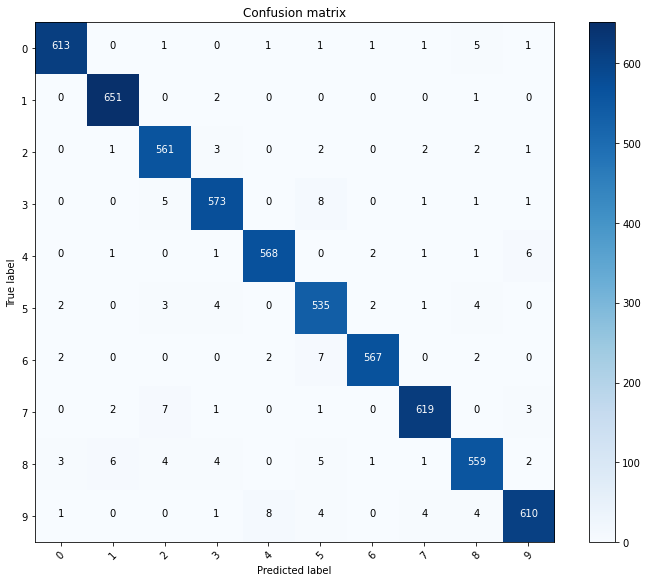

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


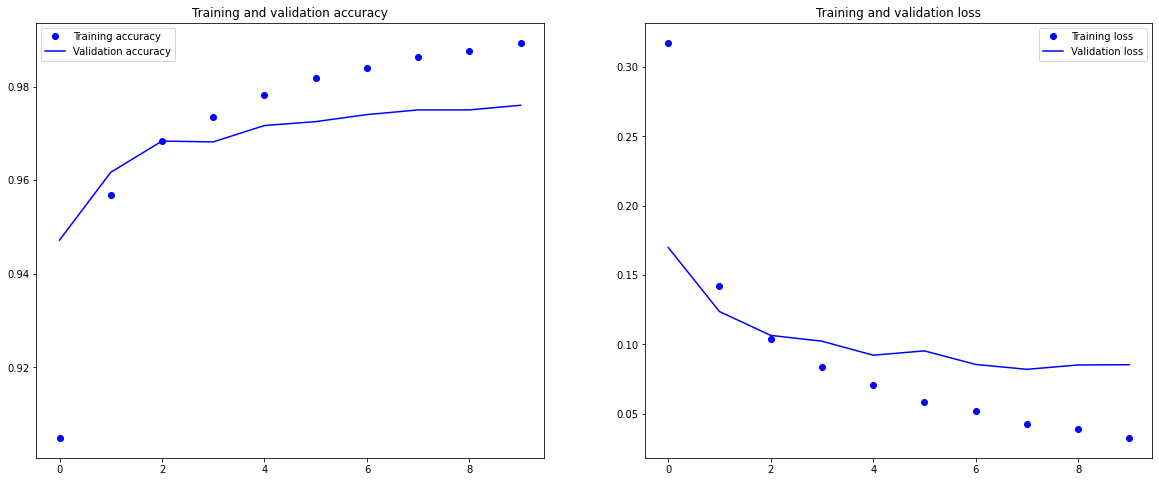

In [ ]:
# Predict the values from the validation dataset
Y_pred = model_nesterov.predict(Val_images)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Val_labels, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

#plot loss curves
plot_loss_curves(h_nesterov)

### Reporte de clasificación

In [ ]:
print_report(model_nesterov)

              precision    recall  f1-score   support

     Class 0       0.98      0.99      0.98       980
     Class 1       0.99      0.99      0.99      1135
     Class 2       0.97      0.98      0.98      1032
     Class 3       0.97      0.98      0.97      1010
     Class 4       0.98      0.97      0.98       982
     Class 5       0.96      0.98      0.97       892
     Class 6       0.99      0.97      0.98       958
     Class 7       0.97      0.97      0.97      1028
     Class 8       0.98      0.97      0.98       974
     Class 9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



## Modelamiento - Adagrad

In [ ]:
# Compile the model.
adagrad = keras.optimizers.Adagrad(learning_rate=0.01)

### Entrenamiento

In [ ]:
# Train the model.
h_adagrad, model_adagrad = build_and_train(adagrad)

Epoch 1/10
1688/1688 [==============================] - 8s 4ms/step - loss: 0.4731 - accuracy: 0.8677 - val_loss: 0.2733 - val_accuracy: 0.9212
Epoch 2/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2460 - accuracy: 0.9297 - val_loss: 0.2138 - val_accuracy: 0.9370
Epoch 3/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2032 - accuracy: 0.9418 - val_loss: 0.1941 - val_accuracy: 0.9415
Epoch 4/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1776 - accuracy: 0.9493 - val_loss: 0.1690 - val_accuracy: 0.9493
Epoch 5/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1601 - accuracy: 0.9540 - val_loss: 0.1583 - val_accuracy: 0.9538
Epoch 6/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1466 - accuracy: 0.9576 - val_loss: 0.1464 - val_accuracy: 0.9570
Epoch 7/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1352 - accuracy: 0.9613 - val_loss: 0.1401 - val_accuracy:

### Evaluación del modelo

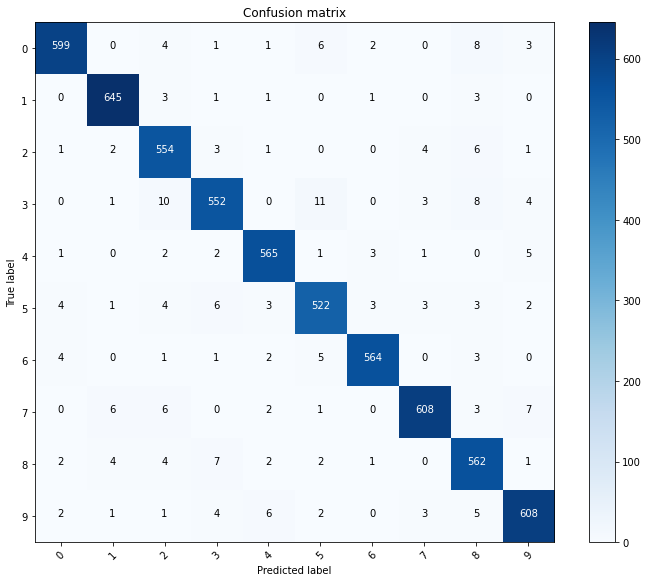

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


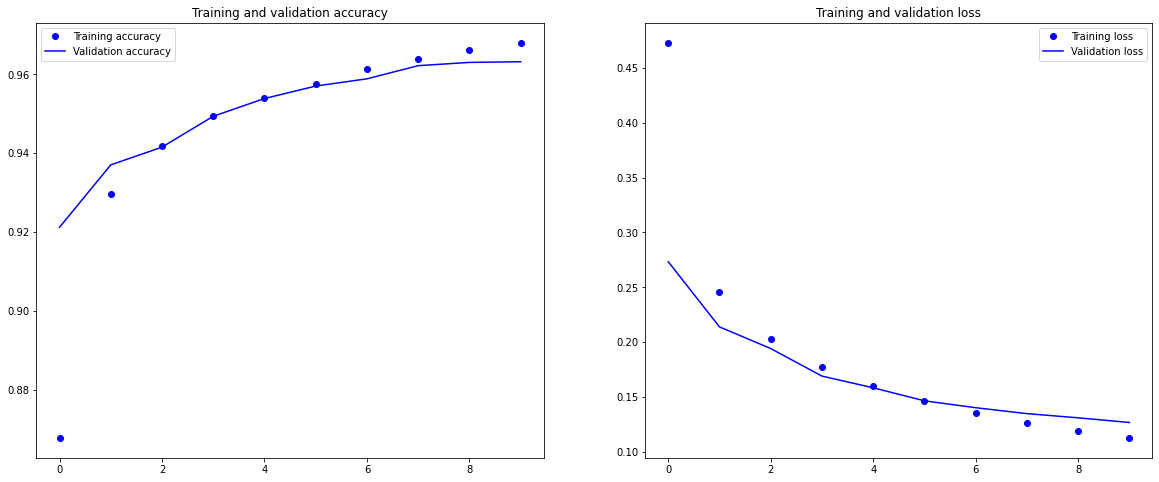

In [ ]:
# Predict the values from the validation dataset
Y_pred = model_adagrad.predict(Val_images)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Val_labels, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

#plot loss curves
plot_loss_curves(h_adagrad)

### Reporte de clasificación

In [ ]:
print_report(model_adagrad)

              precision    recall  f1-score   support

     Class 0       0.97      0.98      0.98       980
     Class 1       0.98      0.98      0.98      1135
     Class 2       0.95      0.97      0.96      1032
     Class 3       0.94      0.95      0.94      1010
     Class 4       0.96      0.97      0.97       982
     Class 5       0.97      0.94      0.95       892
     Class 6       0.96      0.97      0.97       958
     Class 7       0.97      0.96      0.96      1028
     Class 8       0.95      0.96      0.95       974
     Class 9       0.96      0.95      0.96      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



## Modelamiento - RSMProp

In [ ]:
# Compile the model.
rmsprop = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

### Entrenamiento

In [ ]:
# Train the model.
h_rms, model_rms = build_and_train(rmsprop)

Epoch 1/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.2903 - accuracy: 0.9152 - val_loss: 0.1659 - val_accuracy: 0.9538
Epoch 2/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1394 - accuracy: 0.9600 - val_loss: 0.1198 - val_accuracy: 0.9648
Epoch 3/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1065 - accuracy: 0.9695 - val_loss: 0.1243 - val_accuracy: 0.9640
Epoch 4/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0870 - accuracy: 0.9747 - val_loss: 0.0973 - val_accuracy: 0.9728
Epoch 5/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0760 - accuracy: 0.9785 - val_loss: 0.0969 - val_accuracy: 0.9735
Epoch 6/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0665 - accuracy: 0.9808 - val_loss: 0.1044 - val_accuracy: 0.9718
Epoch 7/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0601 - accuracy: 0.9840 - val_loss: 0.1031 - val_accuracy:

### Evaluación del modelo

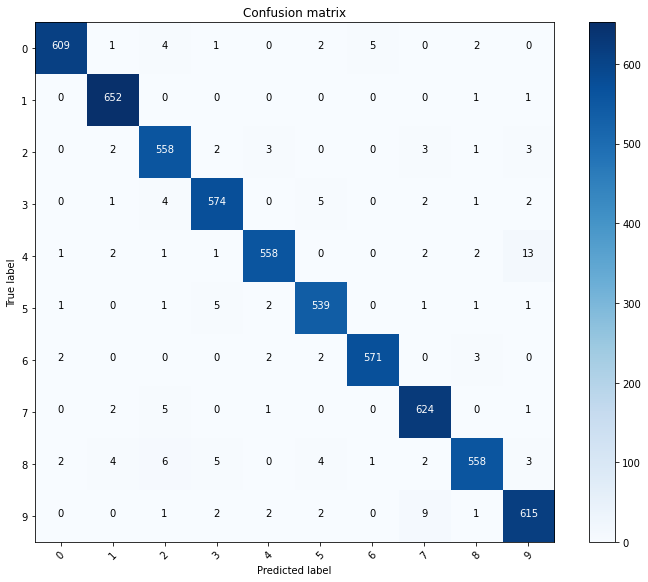

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


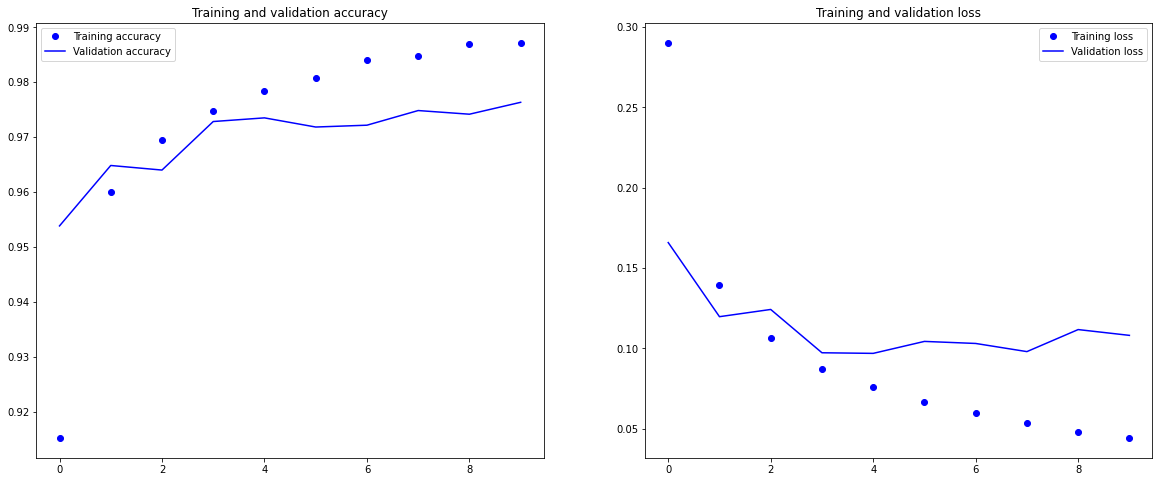

In [ ]:
# Predict the values from the validation dataset
Y_pred = model_rms.predict(Val_images)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Val_labels, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

#plot loss curves
plot_loss_curves(h_rms)

### Reporte de clasificación

In [ ]:
print_report(model_rms)

              precision    recall  f1-score   support

     Class 0       0.98      0.98      0.98       980
     Class 1       0.98      0.99      0.99      1135
     Class 2       0.97      0.98      0.97      1032
     Class 3       0.97      0.97      0.97      1010
     Class 4       0.99      0.96      0.97       982
     Class 5       0.98      0.97      0.97       892
     Class 6       0.98      0.98      0.98       958
     Class 7       0.96      0.98      0.97      1028
     Class 8       0.98      0.96      0.97       974
     Class 9       0.96      0.97      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



## Modelamiento - Adam

In [ ]:
# Compile the model.
adam = keras.optimizers.Adam(learning_rate=0.001)

### Entrenamiento

In [ ]:
# Train the model.
h_adam, model_adam = build_and_train(adam)

Epoch 1/10
1688/1688 [==============================] - 8s 4ms/step - loss: 0.2971 - accuracy: 0.9134 - val_loss: 0.1785 - val_accuracy: 0.9435
Epoch 2/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1350 - accuracy: 0.9592 - val_loss: 0.1142 - val_accuracy: 0.9652
Epoch 3/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0969 - accuracy: 0.9703 - val_loss: 0.1016 - val_accuracy: 0.9697
Epoch 4/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0763 - accuracy: 0.9767 - val_loss: 0.0830 - val_accuracy: 0.9737
Epoch 5/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0614 - accuracy: 0.9808 - val_loss: 0.0857 - val_accuracy: 0.9750
Epoch 6/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0500 - accuracy: 0.9840 - val_loss: 0.0867 - val_accuracy: 0.9725
Epoch 7/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0428 - accuracy: 0.9856 - val_loss: 0.0947 - val_accuracy:

### Evaluación del modelo

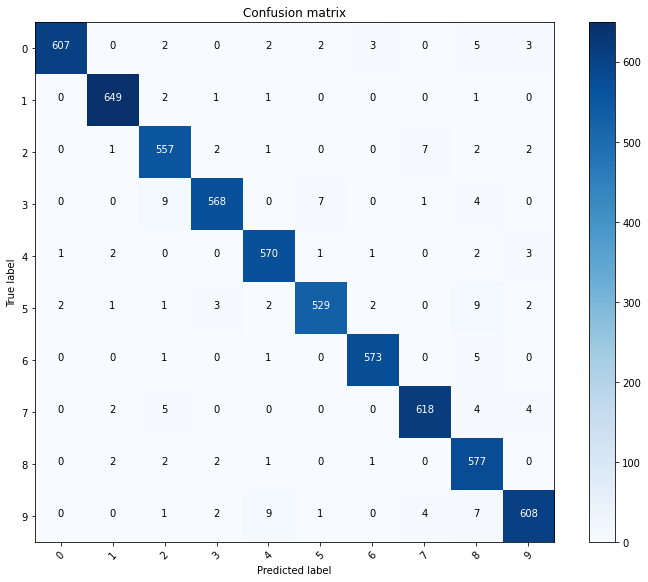

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


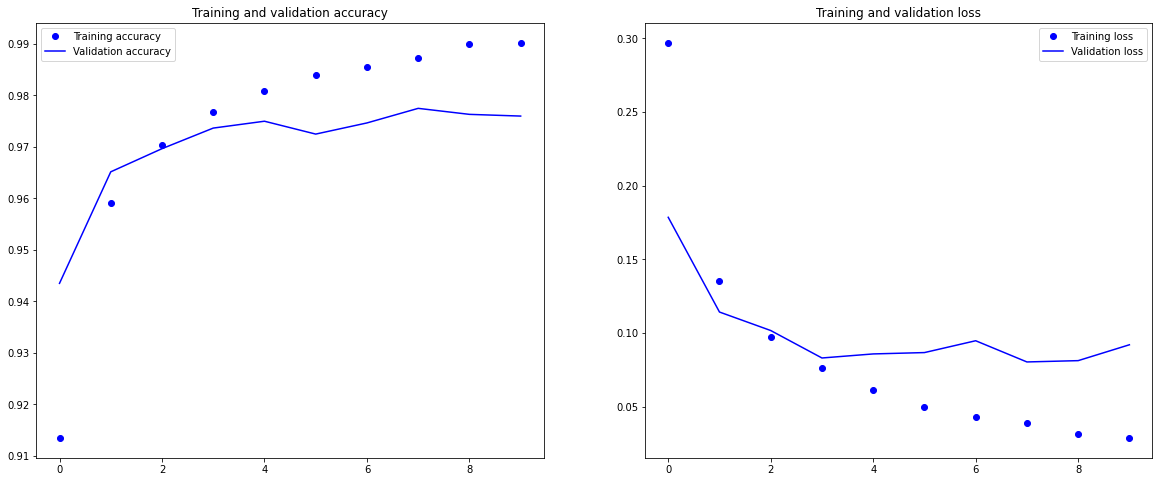

In [ ]:
# Predict the values from the validation dataset
Y_pred = model_adam.predict(Val_images)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Val_labels, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

#plot loss curves
plot_loss_curves(h_adam)

### Reporte de clasificación

In [ ]:
print_report(model_adam)

              precision    recall  f1-score   support

     Class 0       0.99      0.99      0.99       980
     Class 1       0.99      0.99      0.99      1135
     Class 2       0.97      0.98      0.97      1032
     Class 3       0.98      0.97      0.97      1010
     Class 4       0.99      0.97      0.98       982
     Class 5       0.98      0.96      0.97       892
     Class 6       0.98      0.98      0.98       958
     Class 7       0.97      0.97      0.97      1028
     Class 8       0.95      0.98      0.96       974
     Class 9       0.96      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



## Modelamiento - Adam - Learning decay

In [ ]:
# Compile the model.
adam = keras.optimizers.Adam()

model_decay = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(784,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

model_decay.compile(
  optimizer= adam,
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

lr = 0.001
def exp_decay(epoch):
  return lr*np.exp(-0.005*epoch)
sched = LearningRateScheduler(exp_decay, verbose=1)

### Entrenamiento

In [ ]:
# Train the model.
h_decay = model_decay.fit(
  Train_images,
  Train_labels,
  validation_data = (Val_images, Val_labels),
  epochs = 10,
  batch_size = 32,
  callbacks=[sched]
)


Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/10
1688/1688 [==============================] - 8s 4ms/step - loss: 0.2899 - accuracy: 0.9167 - val_loss: 0.1596 - val_accuracy: 0.9493 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0009950124791926823.
Epoch 2/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1338 - accuracy: 0.9594 - val_loss: 0.1164 - val_accuracy: 0.9647 - lr: 9.9501e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.000990049833749168.
Epoch 3/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0977 - accuracy: 0.9708 - val_loss: 0.0969 - val_accuracy: 0.9712 - lr: 9.9005e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.0009851119396030628.
Epoch 4/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0770 - accuracy: 0.9764 - val_loss: 0.0941 - val_accuracy: 0.9720 - lr: 9.8511e-04

Epoch 5: LearningRateScheduler setting learning rate to 

### Evaluación del modelo

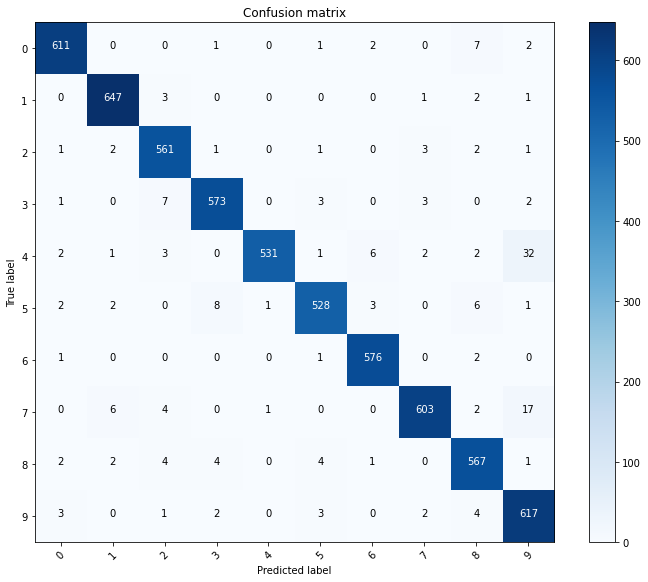

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


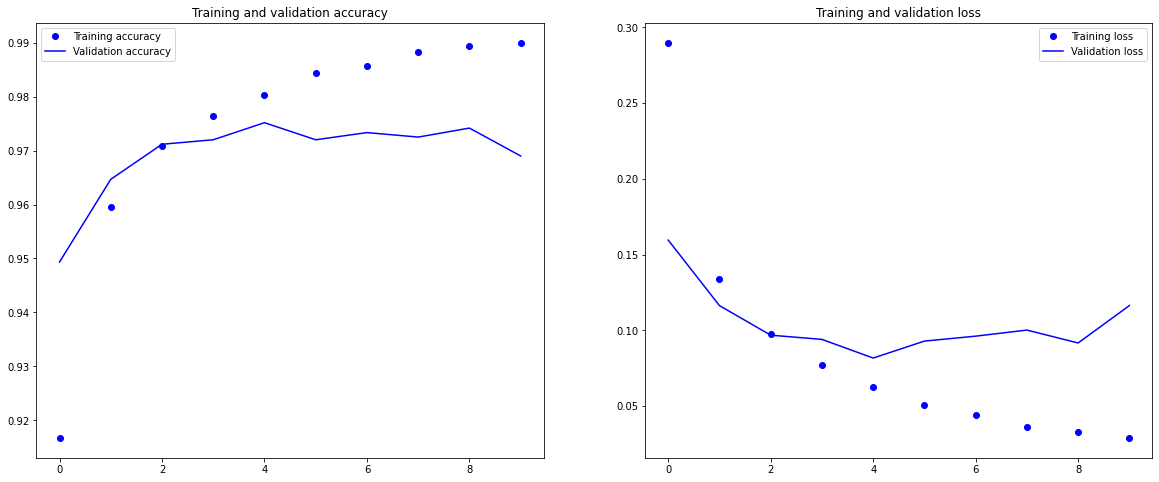

In [ ]:
# Predict the values from the validation dataset
Y_pred = model_decay.predict(Val_images)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Val_labels, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

#plot loss curves
plot_loss_curves(h_decay)

### Reporte de clasificación

In [ ]:
print_report(model_decay)

              precision    recall  f1-score   support

     Class 0       0.98      0.99      0.98       980
     Class 1       0.99      0.99      0.99      1135
     Class 2       0.97      0.98      0.98      1032
     Class 3       0.96      0.97      0.97      1010
     Class 4       0.99      0.93      0.96       982
     Class 5       0.97      0.97      0.97       892
     Class 6       0.97      0.98      0.98       958
     Class 7       0.98      0.95      0.96      1028
     Class 8       0.97      0.96      0.97       974
     Class 9       0.93      0.98      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



## Comparación de curvas de loss

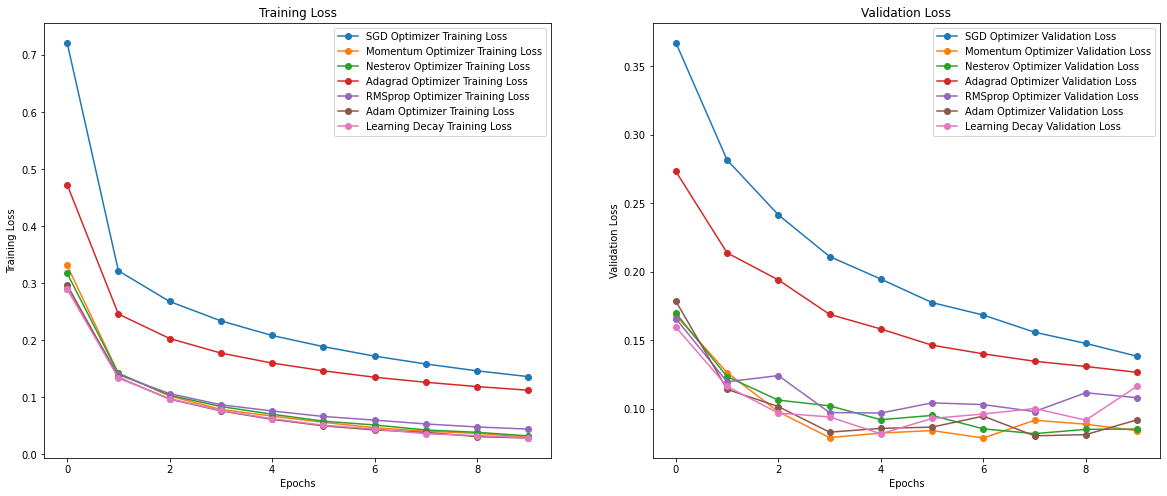

In [ ]:
loss_sgd = h_sgd.history['loss']
loss_momentum = h_momentum.history['loss']
loss_nesterov = h_nesterov.history['loss']
loss_adagrad = h_adagrad.history['loss']
loss_rmsprop = h_rms.history['loss']
loss_adam = h_adam.history['loss']
loss_decay = h_decay.history['loss']

epochs_range = range(10)

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, loss_sgd, '-o', label='SGD Optimizer Training Loss')
plt.plot(epochs_range, loss_momentum, '-o', label='Momentum Optimizer Training Loss')
plt.plot(epochs_range, loss_nesterov, '-o', label='Nesterov Optimizer Training Loss')
plt.plot(epochs_range, loss_adagrad, '-o', label='Adagrad Optimizer Training Loss')
plt.plot(epochs_range, loss_rmsprop, '-o', label='RMSprop Optimizer Training Loss')
plt.plot(epochs_range, loss_adam, '-o', label='Adam Optimizer Training Loss')
plt.plot(epochs_range, loss_decay, '-o', label='Learning Decay Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')


val_loss_sgd = h_sgd.history['val_loss']
val_loss_momentum = h_momentum.history['val_loss']
val_loss_nesterov = h_nesterov.history['val_loss']
val_loss_adagrad = h_adagrad.history['val_loss']
val_loss_rmsprop = h_rms.history['val_loss']
val_loss_adam = h_adam.history['val_loss']
val_loss_decay = h_decay.history['val_loss']

plt.subplot(1, 2, 2)
plt.plot(epochs_range, val_loss_sgd, '-o', label='SGD Optimizer Validation Loss')
plt.plot(epochs_range, val_loss_momentum, '-o', label='Momentum Optimizer Validation Loss')
plt.plot(epochs_range, val_loss_nesterov, '-o', label='Nesterov Optimizer Validation Loss')
plt.plot(epochs_range, val_loss_adagrad, '-o', label='Adagrad Optimizer Validation Loss')
plt.plot(epochs_range, val_loss_rmsprop, '-o', label='RMSprop Optimizer Validation Loss')
plt.plot(epochs_range, val_loss_adam, '-o', label='Adam Optimizer Validation Loss')
plt.plot(epochs_range, val_loss_decay, '-o', label='Learning Decay Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend(loc='upper right')
plt.title('Validation Loss')
plt.show()

**Pregunta 1. Experimentar con otro optimizador (Sugerencia: Adamax / Nadam / Adadelta). Agregar las líneas de código necesarias para que incluya un mecanismo de learning rate decay (el que usted prefiera). Comente sus resultados en la fase de evaluación y predicción del test**

In [ ]:
nadam = keras.optimizers.Nadam()

model_nadam_decay = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(784,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

model_nadam_decay.compile(
  optimizer= nadam,
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

h_nadam_decay = model_nadam_decay.fit(
  Train_images,
  Train_labels,
  validation_data = (Val_images, Val_labels),
  epochs = 10,
  batch_size = 32,
  callbacks=[sched]
)


Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.2822 - accuracy: 0.9190 - val_loss: 0.1428 - val_accuracy: 0.9558 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0009950124791926823.
Epoch 2/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.1278 - accuracy: 0.9611 - val_loss: 0.1216 - val_accuracy: 0.9642 - lr: 9.9501e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.000990049833749168.
Epoch 3/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.0932 - accuracy: 0.9715 - val_loss: 0.0993 - val_accuracy: 0.9690 - lr: 9.9005e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.0009851119396030628.
Epoch 4/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0730 - accuracy: 0.9778 - val_loss: 0.0965 - val_accuracy: 0.9728 - lr: 9.8511e-04

Epoch 5: LearningRateScheduler setting learning rate 

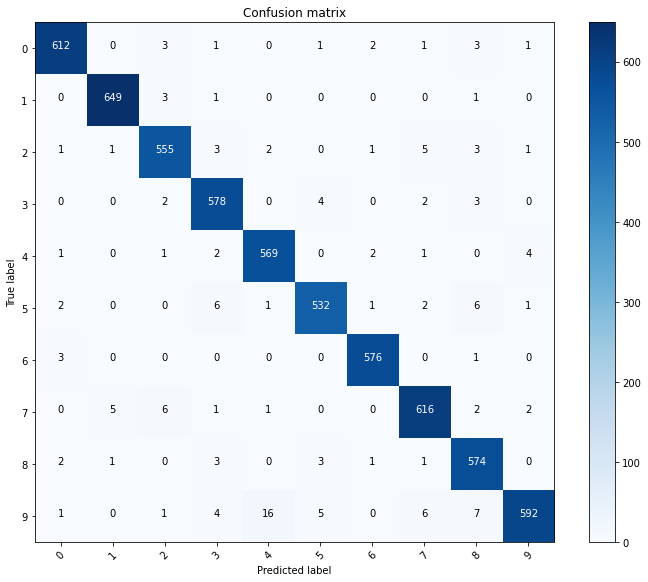

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


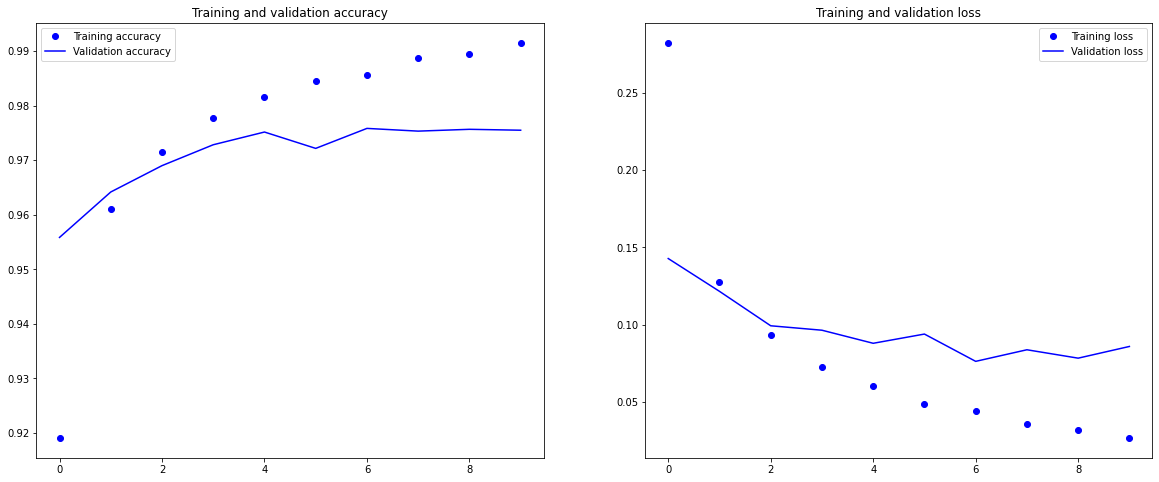

In [ ]:
Y_pred = model_nadam_decay.predict(Val_images)

Y_pred_classes = np.argmax(Y_pred, axis = 1) 

Y_true = np.argmax(Val_labels, axis = 1) 

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

plot_confusion_matrix(confusion_mtx, classes = range(10))


plot_loss_curves(h_nadam_decay)

In [ ]:
print_report(model_adam)

              precision    recall  f1-score   support

     Class 0       0.99      0.99      0.99       980
     Class 1       0.99      0.99      0.99      1135
     Class 2       0.97      0.98      0.97      1032
     Class 3       0.98      0.97      0.97      1010
     Class 4       0.99      0.97      0.98       982
     Class 5       0.98      0.96      0.97       892
     Class 6       0.98      0.98      0.98       958
     Class 7       0.97      0.97      0.97      1028
     Class 8       0.95      0.98      0.96       974
     Class 9       0.96      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



**Pregunta 2. En base a lo ya mostrado, experimentar con otros learning rate sobre un optimizador de su elección, incluyendo mecanismo de learning rate decay en caso vean conveniente. Comente sus resultados en la fase de evaluación y predicción del test**

In [ ]:
nesterov_v2 = keras.optimizers.SGD(momentum=0.9, nesterov=True)

model_nesterov_decay = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(784,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

model_nesterov_decay.compile(
  optimizer= nesterov_v2,
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

lr = 0.03
def exp_decay(epoch):
  return lr*np.exp(-0.005*epoch)
sched = LearningRateScheduler(exp_decay, verbose=1)

h_nesterov_decay = model_nesterov_decay.fit(
  Train_images,
  Train_labels,
  validation_data = (Val_images, Val_labels),
  epochs = 10,
  batch_size = 32,
  callbacks=[sched]
)


Epoch 1: LearningRateScheduler setting learning rate to 0.03.
Epoch 1/10
1688/1688 [==============================] - 8s 4ms/step - loss: 0.2520 - accuracy: 0.9231 - val_loss: 0.1263 - val_accuracy: 0.9588 - lr: 0.0300

Epoch 2: LearningRateScheduler setting learning rate to 0.029850374375780468.
Epoch 2/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1285 - accuracy: 0.9613 - val_loss: 0.1155 - val_accuracy: 0.9665 - lr: 0.0299

Epoch 3: LearningRateScheduler setting learning rate to 0.029701495012475043.
Epoch 3/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0962 - accuracy: 0.9714 - val_loss: 0.1522 - val_accuracy: 0.9558 - lr: 0.0297

Epoch 4: LearningRateScheduler setting learning rate to 0.029553358188091877.
Epoch 4/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0811 - accuracy: 0.9747 - val_loss: 0.1081 - val_accuracy: 0.9692 - lr: 0.0296

Epoch 5: LearningRateScheduler setting learning rate to 0.0294059601992

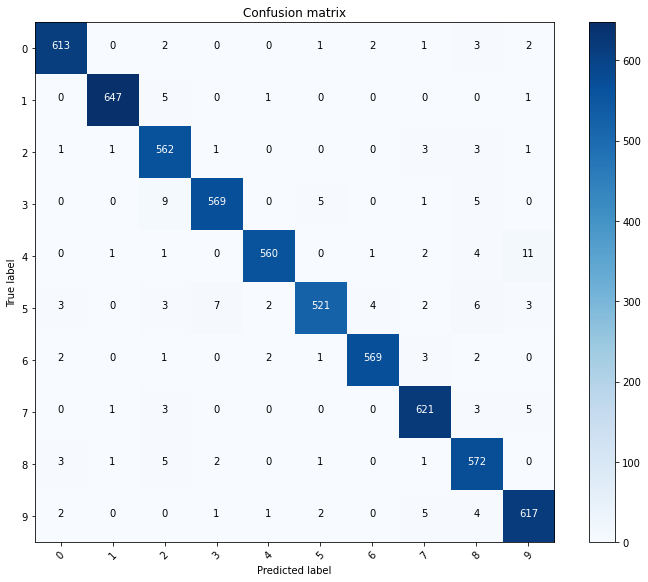

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


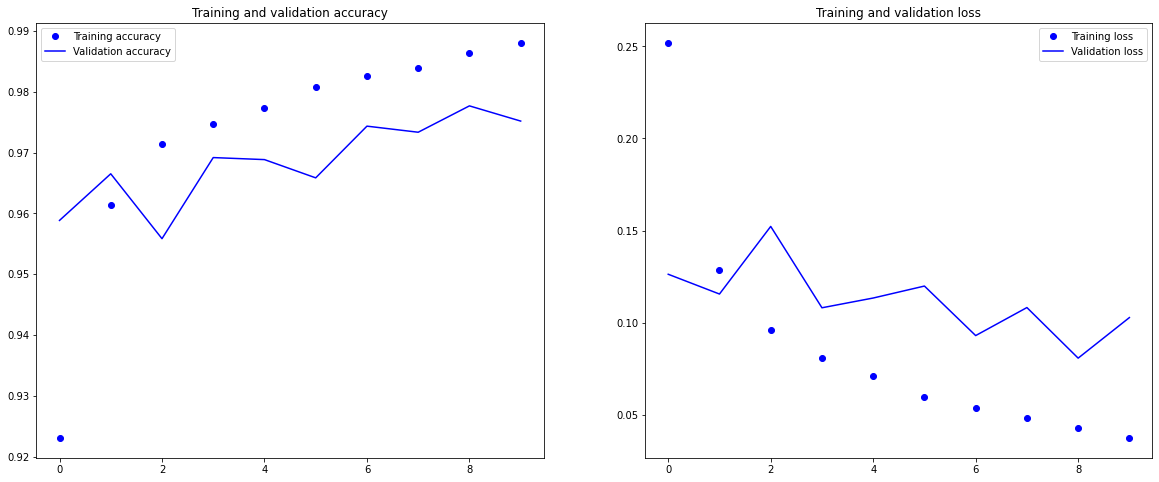

In [ ]:
Y_pred = model_nesterov_decay.predict(Val_images)

Y_pred_classes = np.argmax(Y_pred, axis = 1) 

Y_true = np.argmax(Val_labels, axis = 1) 

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

plot_confusion_matrix(confusion_mtx, classes = range(10))


plot_loss_curves(h_nesterov_decay)

In [ ]:
print_report(model_nesterov_decay)

              precision    recall  f1-score   support

     Class 0       0.97      0.99      0.98       980
     Class 1       0.99      0.99      0.99      1135
     Class 2       0.96      0.97      0.97      1032
     Class 3       0.97      0.97      0.97      1010
     Class 4       0.97      0.96      0.97       982
     Class 5       0.98      0.96      0.97       892
     Class 6       0.98      0.96      0.97       958
     Class 7       0.98      0.97      0.98      1028
     Class 8       0.96      0.98      0.97       974
     Class 9       0.96      0.97      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

